<a href="https://colab.research.google.com/github/Saumye13/Autism_Detection/blob/main/Autism_Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Data Visualization

In [ ]:
# Load dataset
data = pd.read_csv('autism_screening.csv')

# Data Cleaning
# Handle missing values
# Drop rows with null values
data.dropna(inplace=True)


In [ ]:
print(data.shape)

(702, 21)


In [ ]:
# Describe the dataset
print(data.describe())

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  702.000000  702.000000  702.000000  702.000000  702.000000  702.000000   
mean     0.723647    0.452991    0.458689    0.497151    0.498575    0.284900   
std      0.447512    0.498140    0.498646    0.500348    0.500354    0.451689   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         Age      Result  
count  702.000000  702.000000  702.000000  702.000000  702.000000  702.000000  
mean     0.417379    0.650997    0.324786    0.574074   29.698006    4.883191  
std      0.493478    0.476995 

In [ ]:
print(data.dtypes)

A1_Score               int64
A2_Score               int64
A3_Score               int64
A4_Score               int64
A5_Score               int64
A6_Score               int64
A7_Score               int64
A8_Score               int64
A9_Score               int64
A10_Score              int64
Age                  float64
Gender                object
Ethnicity             object
Jaundice              object
Relative with PDD     object
Country               object
Used App before       object
Result                 int64
Age Description       object
Relation              object
Class/ASD             object
dtype: object


In [ ]:
print(data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  Gender       Ethnicity Jaundice  \
0         1         0          0  ...       f  White-European       no   
1         1         0          1  ...       m          Latino       no   
2         1         1          1  ...       m          Latino      yes   
3         1         0          1  ...       f  White-European       no   
4         1         0          0  ...       f               ?       no   

  Relative with PDD        Country Used App before Result  Age Description  \
0                no  Unite

<Figure size 1000x600 with 0 Axes>

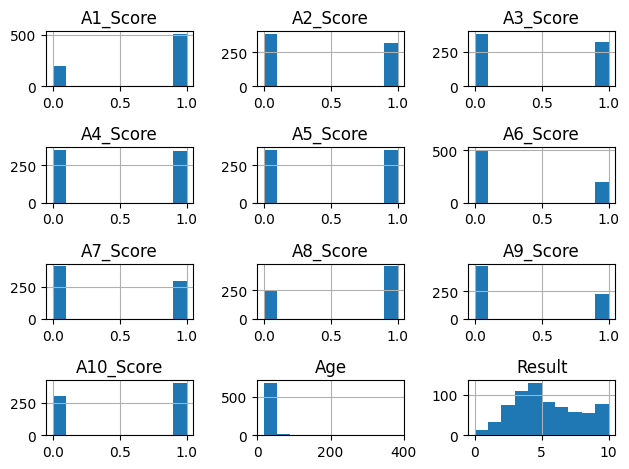

In [ ]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
data.hist()
plt.tight_layout()
plt.show()


Counts of values in the target variable:

NO     513
YES    189
Name: Class/ASD, dtype: int64


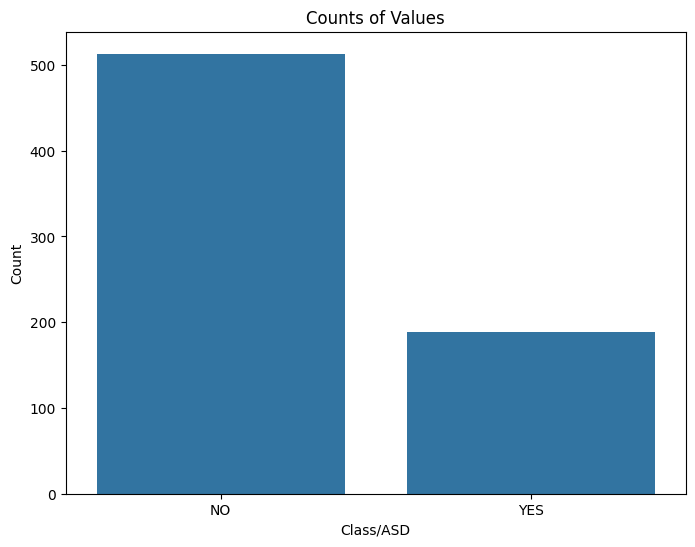

In [ ]:
target_counts = data['Class/ASD'].value_counts()

# Display counts of values in the target variable
print("\nCounts of values in the target variable:\n")
print(target_counts)

# Visualize the counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class/ASD')
plt.title('Counts of Values')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [ ]:
# Data Splitting

# Define features (X) and target variable (y)
X = data.drop(columns=['Class/ASD'])
y = data['Class/ASD']

In [ ]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

# Encode categorical features
X_encoded = pd.get_dummies(X_scaled, columns=categorical_cols)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

In [ ]:
y_train_vector = y_train
y_test_vector = y_test

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
column_names=data.columns
print(column_names)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Relative with PDD', 'Country',
       'Used App before', 'Result', 'Age Description', 'Relation',
       'Class/ASD'],
      dtype='object')


In [ ]:
feature_names=X_encoded.columns
print(feature_names)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       ...
       'Country_Viet Nam', 'Used App before_no', 'Used App before_yes',
       'Age Description_18 and more', 'Relation_?',
       'Relation_Health care professional', 'Relation_Others',
       'Relation_Parent', 'Relation_Relative', 'Relation_Self'],
      dtype='object', length=106)


In [ ]:
# target_names=data['Class/ASD'].unique()
target_names=['No', 'Yes']
print(target_names)

['No', 'Yes']


In [ ]:
print(X_encoded.shape)

(702, 106)


In [ ]:
print(y.shape)

(702, 1)


# Performance Metrics

In [ ]:
# Evaluate the model

# Calculate performance metrics

def performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
    cr = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print("\nClassification Report:")
    print(cr)
    print("\nConfusion Matrix:")
    disp.plot(cmap='Blues', values_format='.0f')
    plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize the Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Train the Logistic model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)


Performance Metrics of Logistic Regression:

Accuracy: 0.9602
Precision: 0.9625
Recall: 0.9602
F1 Score: 0.9595
Mean Squared Error: 0.0398

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.88      0.94        58

    accuracy                           0.96       176
   macro avg       0.97      0.94      0.95       176
weighted avg       0.96      0.96      0.96       176


Confusion Matrix:


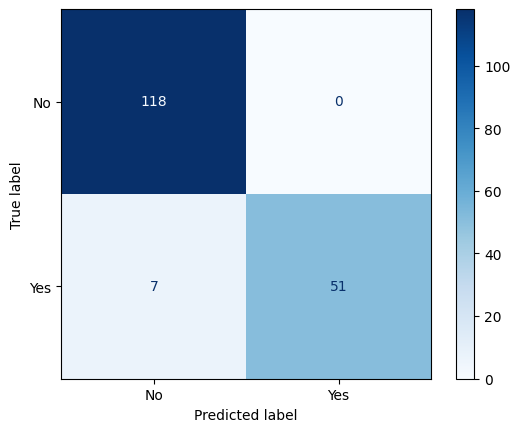

In [ ]:
print("\nPerformance Metrics of Logistic Regression:\n")
performance_metrics(y_test, y_pred)

# Naive Baye's

In [ ]:
from sklearn import naive_bayes

In [ ]:
# Initialize the Naive Baye's Classifier
nb = naive_bayes.GaussianNB()

# Train the Logistic model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)


Performance Metrics of Naive Baye's:

Accuracy: 0.3693
Precision: 0.6604
Recall: 0.3693
F1 Score: 0.2591
Mean Squared Error: 0.6307

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.08      0.14       118
           1       0.34      0.97      0.50        58

    accuracy                           0.37       176
   macro avg       0.58      0.52      0.32       176
weighted avg       0.66      0.37      0.26       176


Confusion Matrix:


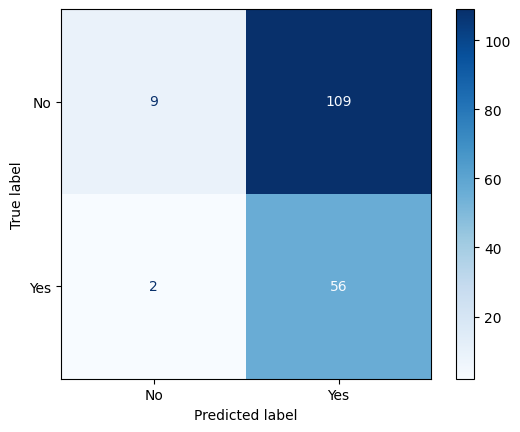

In [ ]:
print("\nPerformance Metrics of Naive Baye's:\n")
performance_metrics(y_test, y_pred)

# k-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### k = 3

In [ ]:
# Initialize the kNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train the kNN model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)



Performance Metrics of kNN (k = 3):

Accuracy: 0.9318
Precision: 0.9318
Recall: 0.9318
F1 Score: 0.9318
Mean Squared Error: 0.0682

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       118
           1       0.90      0.90      0.90        58

    accuracy                           0.93       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.93      0.93      0.93       176


Confusion Matrix:


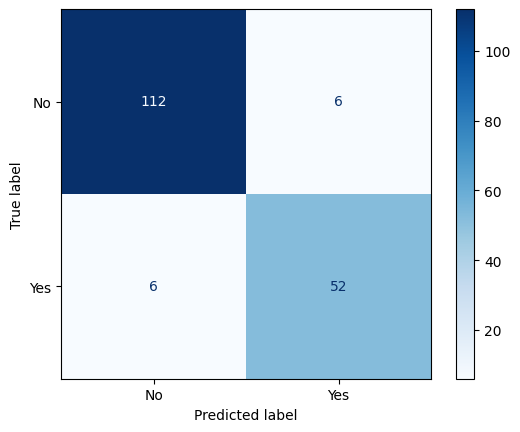

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of kNN (k = 3):\n")
performance_metrics(y_test, y_pred)

### k = 5

In [ ]:
# Initialize the kNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the kNN model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)



Performance Metrics of kNN (k = 5):

Accuracy: 0.9261
Precision: 0.9259
Recall: 0.9261
F1 Score: 0.9260
Mean Squared Error: 0.0739

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       118
           1       0.89      0.88      0.89        58

    accuracy                           0.93       176
   macro avg       0.92      0.91      0.92       176
weighted avg       0.93      0.93      0.93       176


Confusion Matrix:


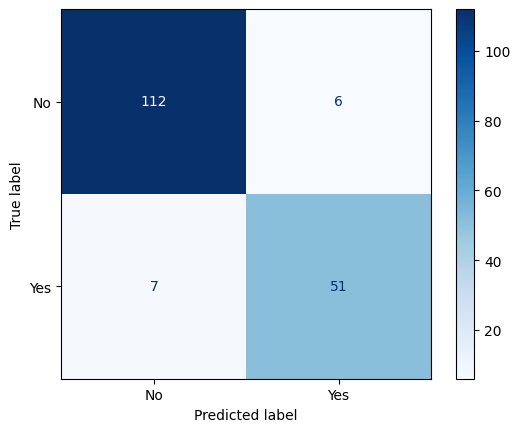

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of kNN (k = 5):\n")
performance_metrics(y_test, y_pred)

### k = 7

In [ ]:
# Initialize the kNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance')

# Train the kNN model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)



Performance Metrics of kNN (k = 7):

Accuracy: 0.9261
Precision: 0.9259
Recall: 0.9261
F1 Score: 0.9260
Mean Squared Error: 0.0739

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       118
           1       0.89      0.88      0.89        58

    accuracy                           0.93       176
   macro avg       0.92      0.91      0.92       176
weighted avg       0.93      0.93      0.93       176


Confusion Matrix:


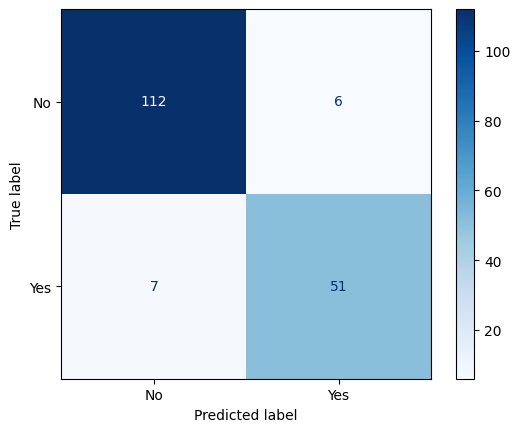

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of kNN (k = 7):\n")
performance_metrics(y_test, y_pred)

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

### Radial Basis Function (RBF) Kernel

In [ ]:
# Initialize the SVC (Support Vector Classifier)
svm_classifier = SVC(C=1, kernel='rbf', gamma='auto')

# Train the SVR model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)


Performance Metrics of SVM with Radial Basis Function Kernel:

Accuracy: 0.9432
Precision: 0.9455
Recall: 0.9432
F1 Score: 0.9420
Mean Squared Error: 0.0568

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       118
           1       0.98      0.84      0.91        58

    accuracy                           0.94       176
   macro avg       0.95      0.92      0.93       176
weighted avg       0.95      0.94      0.94       176


Confusion Matrix:


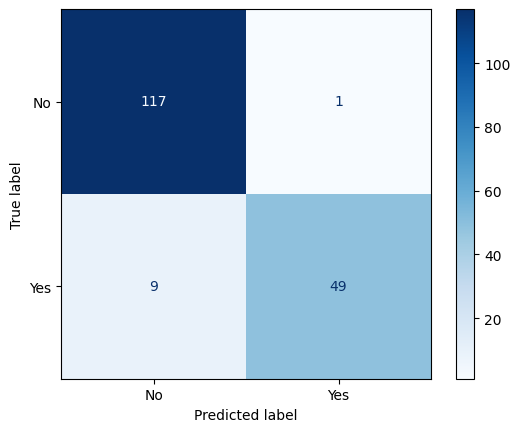

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of SVM with Radial Basis Function Kernel:\n")
performance_metrics(y_test, y_pred)

### Polynomial Kernel

In [ ]:
# Initialize the SVR (Support Vector Classifier)
svm_classifier = SVC(C=1, kernel='poly', degree=3, gamma='auto')

# Train the SVR model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)


Performance Metrics of SVM with Polynomial Kernel:

Accuracy: 0.6705
Precision: 0.4495
Recall: 0.6705
F1 Score: 0.5382
Mean Squared Error: 0.3295

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       118
           1       0.00      0.00      0.00        58

    accuracy                           0.67       176
   macro avg       0.34      0.50      0.40       176
weighted avg       0.45      0.67      0.54       176


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

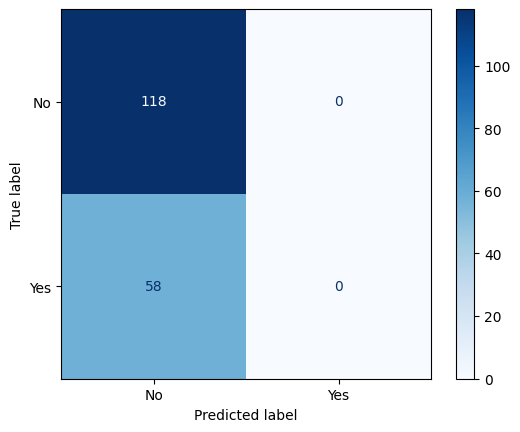

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of SVM with Polynomial Kernel:\n")
performance_metrics(y_test, y_pred)

### Linear Kernel

In [ ]:
# Initialize the SVR (Support Vector Classifier)
svm_classifier = SVC(C=1, kernel='linear', gamma='auto')

# Train the SVR model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)


Performance Metrics of SVM with Linear Kernel:

Accuracy: 0.9943
Precision: 0.9944
Recall: 0.9943
F1 Score: 0.9943
Mean Squared Error: 0.0057

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      0.98      0.99        58

    accuracy                           0.99       176
   macro avg       1.00      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176


Confusion Matrix:


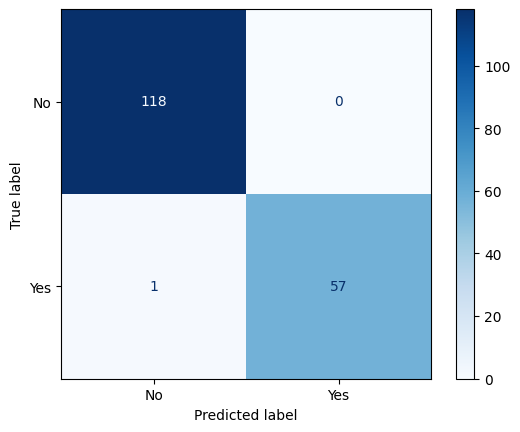

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of SVM with Linear Kernel:\n")
performance_metrics(y_test, y_pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

### ID3

In [ ]:
# Create Decision Tree classifer object
id3_classifier = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
id3_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = id3_classifier.predict(X_test)



ID3 Decision Tree:



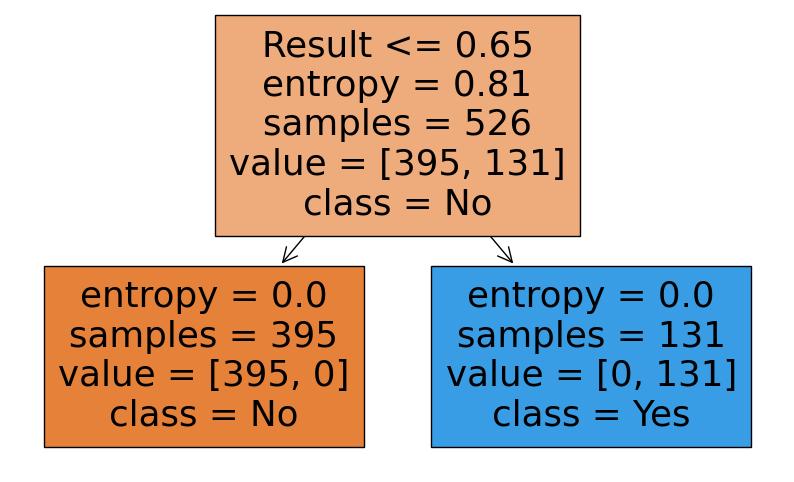

In [ ]:
# Visualize the decision tree
print("\nID3 Decision Tree:\n")
plt.figure(figsize=(10, 6))
plot_tree(id3_classifier, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()


Performance Metrics of ID3 Decision Tree:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


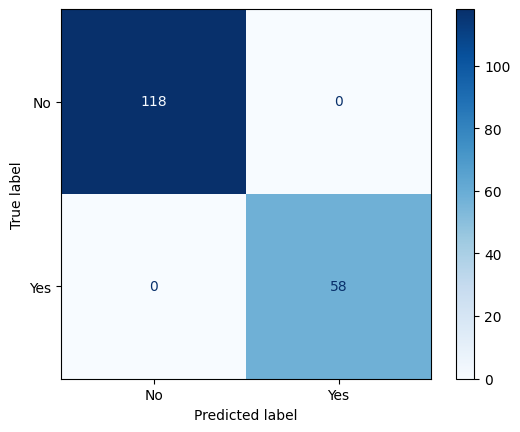

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of ID3 Decision Tree:\n")
performance_metrics(y_test, y_pred)

### CART

In [ ]:
# Create Decision Tree classifer object
cart_classifier = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
cart_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = cart_classifier.predict(X_test)



CART Decision Tree:



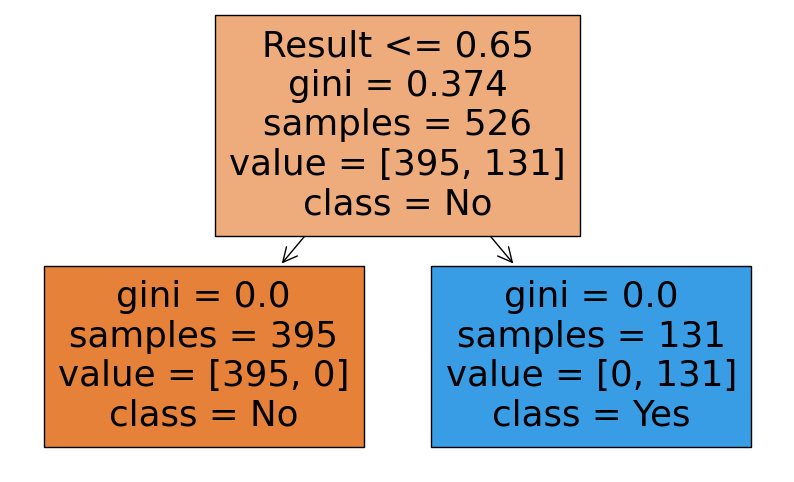

In [ ]:
# Visualize the decision tree
print("\nCART Decision Tree:\n")
plt.figure(figsize=(10, 6))
plot_tree(cart_classifier, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()


Performance Metrics of CART Decision Tree:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


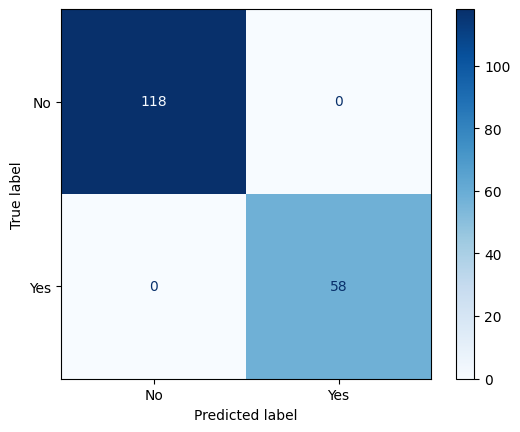

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of CART Decision Tree:\n")
performance_metrics(y_test, y_pred)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### ID3

In [ ]:
# Initialize the Random Forest Classifier
id3_rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the Random Forest model
id3_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = id3_rf_classifier.predict(X_test)


ID3 Decision Tree 0:



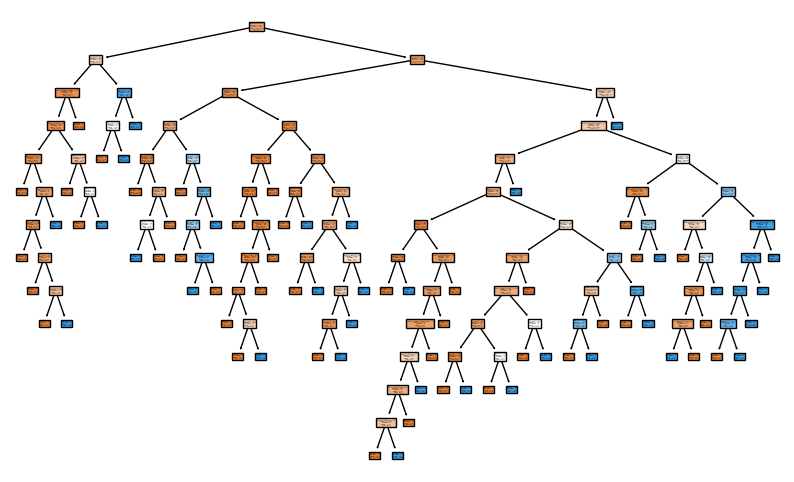


ID3 Decision Tree 1:



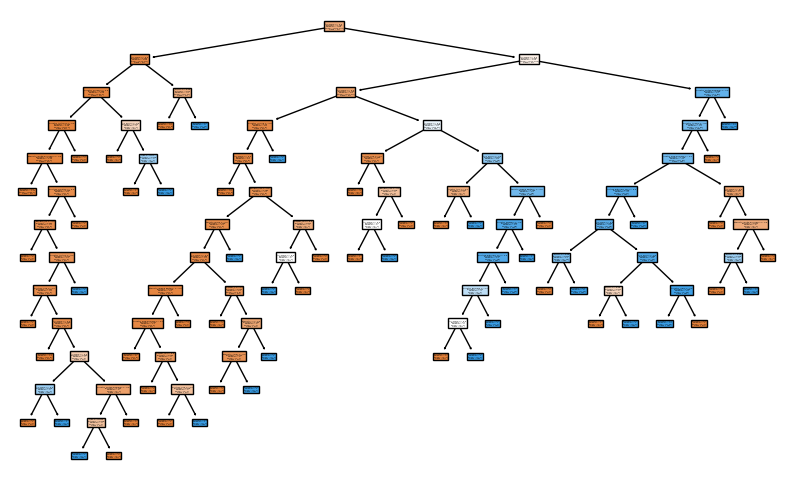


ID3 Decision Tree 2:



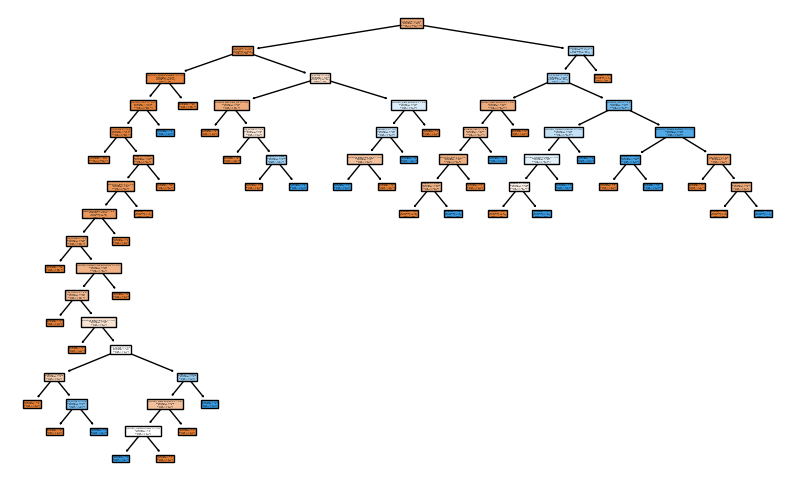

In [ ]:
# Visualize the first 3 Decision Trees from the ID3 Random Forest
for i in range(3):
    tree_to_plot=id3_rf_classifier.estimators_[i]
    print(f"\nID3 Decision Tree {i}:\n")
    plt.figure(figsize=(10, 6))
    plot_tree(tree_to_plot, feature_names=feature_names, class_names=target_names, filled=True)
    plt.show()


Performance Metrics of ID3 Random Forest:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


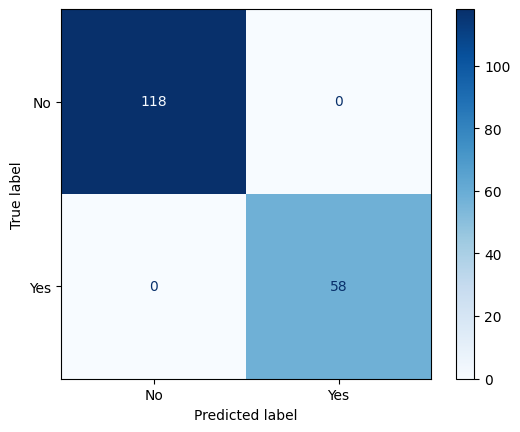

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of ID3 Random Forest:\n")
performance_metrics(y_test, y_pred)

### CART

In [ ]:
# Initialize the Random Forest classifier
cart_rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Train the Random Forest model
cart_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = cart_rf_classifier.predict(X_test)


CART Decision Tree 0:



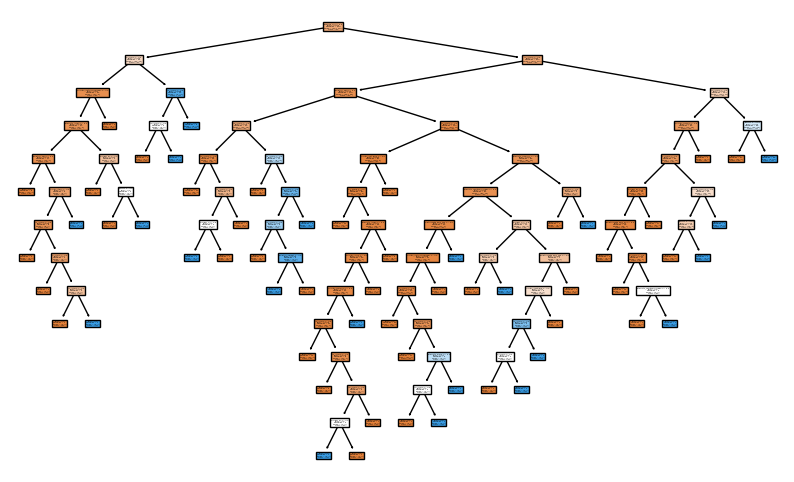


CART Decision Tree 1:



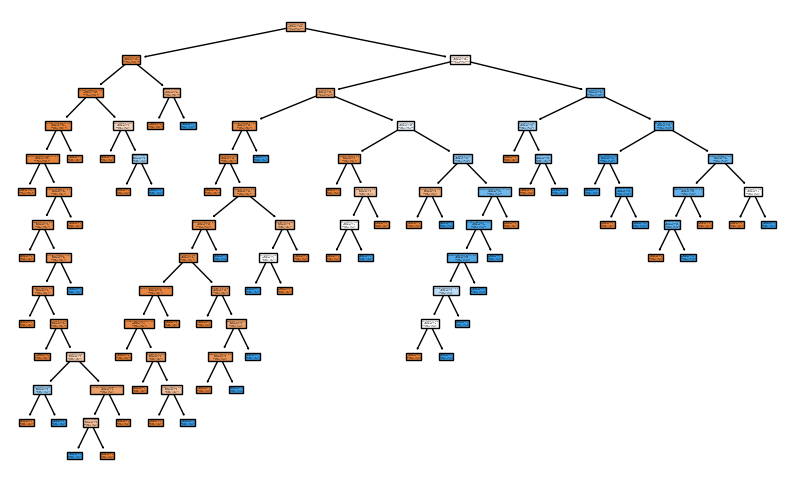


CART Decision Tree 2:



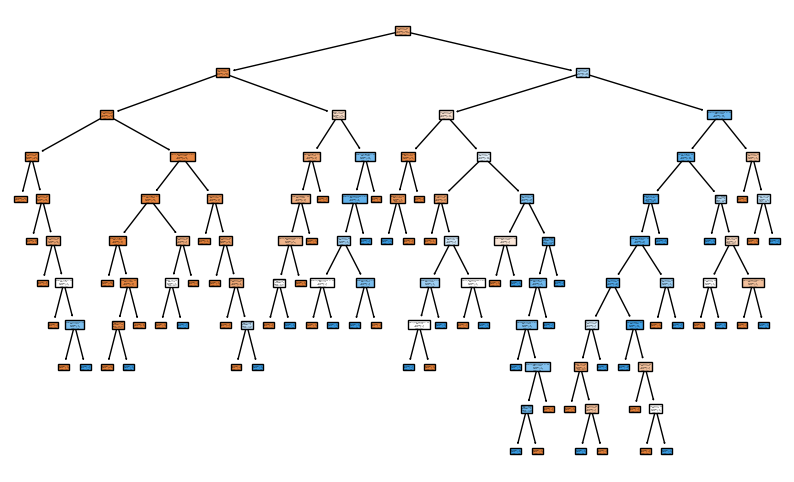

In [ ]:
# Visualize the first 3 Decision Trees from the CART Random Forest
for i in range(3):
    tree_to_plot=cart_rf_classifier.estimators_[i]
    print(f"\nCART Decision Tree {i}:\n")
    plt.figure(figsize=(10, 6))
    plot_tree(tree_to_plot, feature_names=feature_names, class_names=target_names, filled=True)
    plt.show()


Performance Metrics of CART Random Forest:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


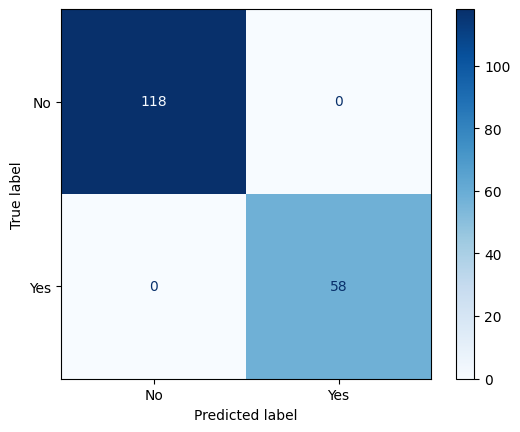

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of CART Random Forest:\n")
performance_metrics(y_test, y_pred)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=1000, criterion='friedman_mse', random_state=42)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)


Performance Metrics of Gradient Boosting:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


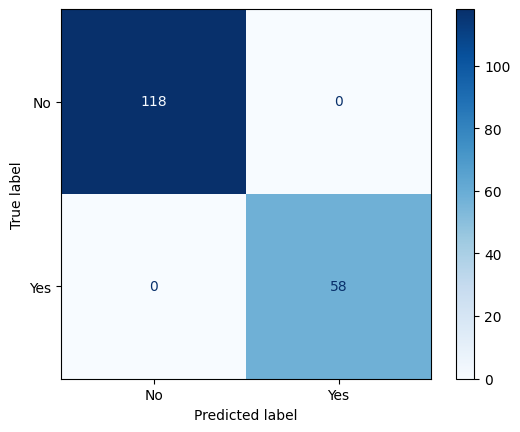

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of Gradient Boosting:\n")
performance_metrics(y_test, y_pred)

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)


Performance Metrics of XGBoost:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


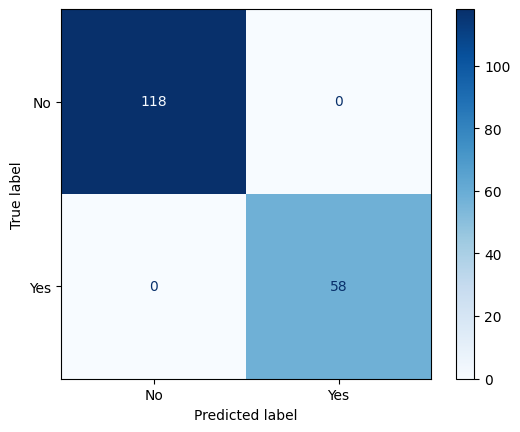

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of XGBoost:\n")
performance_metrics(y_test, y_pred)

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Initialize the Gradient Boosting Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)

# Train the Gradient Boosting model
ada_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ada_classifier.predict(X_test)


Performance Metrics of AdaBoost:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176


Confusion Matrix:


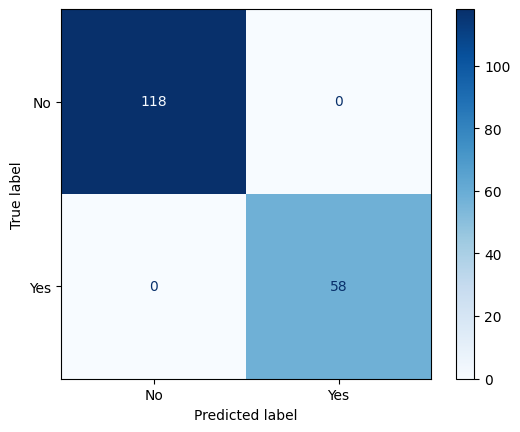

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of AdaBoost:\n")
performance_metrics(y_test, y_pred)

# Gaussian Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

### Radial Basis Function Kernel

In [ ]:
# Define the kernel for Gaussian Process
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))

# Initialize the Gaussian Process classifier
gp_classifier = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Train the Gaussian Process model
gp_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gp_classifier.predict(X_test)


Performance Metrics of Gaussian Process:

Accuracy: 0.9602
Precision: 0.9625
Recall: 0.9602
F1 Score: 0.9595
Mean Squared Error: 0.0398

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.88      0.94        58

    accuracy                           0.96       176
   macro avg       0.97      0.94      0.95       176
weighted avg       0.96      0.96      0.96       176


Confusion Matrix:


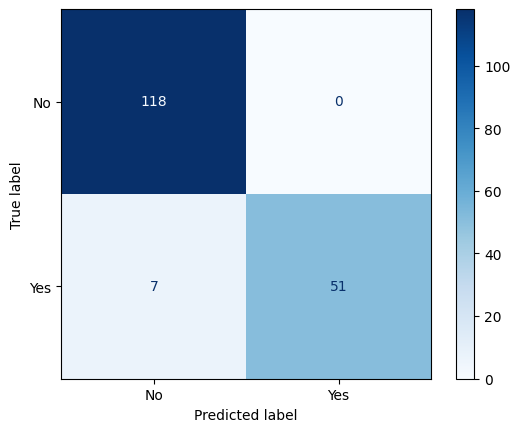

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of Gaussian Process:\n")
performance_metrics(y_test, y_pred)

### Mixed Kernel

In [ ]:
# Define the kernel for Gaussian Process
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e5))

# Initialize the Gaussian Process classifier
gp_classifier = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Train the Gaussian Process model
gp_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gp_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



Performance Metrics of Gaussian Process:

Accuracy: 0.9602
Precision: 0.9625
Recall: 0.9602
F1 Score: 0.9595
Mean Squared Error: 0.0398

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.88      0.94        58

    accuracy                           0.96       176
   macro avg       0.97      0.94      0.95       176
weighted avg       0.96      0.96      0.96       176


Confusion Matrix:


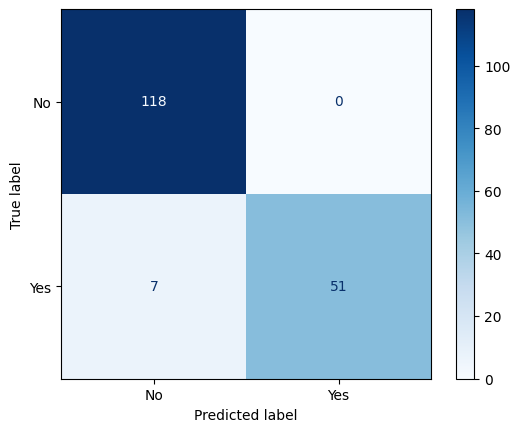

In [ ]:
# Evaluate the model

# Calculate performance metrics
print("\nPerformance Metrics of Gaussian Process:\n")
performance_metrics(y_test, y_pred)

# Generative Adversarial Networks

In [ ]:
print(X_encoded.shape)
print(y.shape)

(702, 106)
(702, 1)


In [ ]:
gan_data = pd.concat([X_encoded, y], axis=1)

gan_data.dropna(inplace=True)

In [ ]:
print(gan_data.shape)

(700, 107)


In [ ]:
print(gan_data.dtypes)

A1_Score             float64
A2_Score             float64
A3_Score             float64
A4_Score             float64
A5_Score             float64
                      ...   
Relation_Others      float64
Relation_Parent      float64
Relation_Relative    float64
Relation_Self        float64
0                    float64
Length: 107, dtype: object


In [ ]:
print(gan_data.describe())

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean     0.722857    0.454286    0.458571    0.495714    0.497143    0.285714   
std      0.447908    0.498262    0.498637    0.500339    0.500349    0.452077   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score  ...  \
count  700.000000  700.000000  700.000000  700.000000  ...   
mean     0.415714    0.651429    0.322857    0.572857  ...   
std      0.493197    0.476859    0.467903    0.495017  ...   
min      0.000000    0

In [ ]:
print(gan_data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0       1.0       1.0       1.0       1.0       0.0       0.0       1.0   
1       1.0       1.0       0.0       1.0       0.0       0.0       0.0   
2       1.0       1.0       0.0       1.0       1.0       0.0       1.0   
3       1.0       1.0       0.0       1.0       0.0       0.0       1.0   
4       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

   A8_Score  A9_Score  A10_Score  ...  Used App before_no  \
0       1.0       0.0        0.0  ...                 1.0   
1       1.0       0.0        1.0  ...                 1.0   
2       1.0       1.0        1.0  ...                 1.0   
3       1.0       0.0        1.0  ...                 1.0   
4       1.0       0.0        0.0  ...                 1.0   

   Used App before_yes  Age Description_18 and more  Relation_?  \
0                  0.0                          1.0         0.0   
1                  0.0                          

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Reshape
from tensorflow.keras.models import Sequential

In [ ]:
# Define the generator network
def build_generator(latent_dim, output_dim):
    model = Sequential([
        # Input layer
        Dense(128, input_dim=latent_dim, activation='relu'),
        Dense(256, activation='relu'),
        Dense(output_dim, activation='sigmoid')  # output_dim depends on the number of features
    ])
    return model


In [ ]:
# Define the discriminator network
def build_discriminator(input_dim):
    model = Sequential([
        # Input layer
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = True
    model = Sequential([
        generator,
        discriminator
    ])
    return model

In [ ]:

# Train the GAN
def train_gan(generator, discriminator, gan, epochs, batch_size, latent_dim, data):
    for epoch in range(epochs):
        # Generate random noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        # Generate fake data
        fake_data = generator.predict(noise)
        # Select a random batch of real data
        real_data = data.sample(batch_size).values
        # Combine real and fake data
        combined_data = np.concatenate([real_data, fake_data])
        # Create labels for real and fake data
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        # Train the discriminator
        d_loss = discriminator.train_on_batch(combined_data, labels)
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        # Print progress
        print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

In [ ]:
# Define parameters
n_samples = 1000  # Number of samples to generate
latent_dim = 100 # Dimensionality of the latent space
epochs = 500
batch_size = 64

In [ ]:

# Determine input and output dimensions
input_dim = gan_data.shape[1]  # Input dimension for discriminator
output_dim = gan_data.shape[1]  # Output dimension for generator

In [ ]:
# Build and compile the discriminator
discriminator = build_discriminator(input_dim)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               13824     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22145 (86.50 KB)
Trainable params: 22145 (86.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Build and compile the generator
generator = build_generator(input_dim, output_dim)
generator.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               13824     
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 107)               27499     
                                                                 
Total params: 74347 (290.42 KB)
Trainable params: 74347 (290.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
gan.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 107)               74347     
                                                                 
 sequential_3 (Sequential)   (None, 1)                 22145     
                                                                 
Total params: 96492 (376.92 KB)
Trainable params: 96492 (376.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the GAN
train_gan(generator, discriminator, gan, epochs, batch_size, input_dim, gan_data)


2/2 [==============================] - 0s 7ms/step
Epoch 1/500, Discriminator Loss: [0.7783505320549011, 0.078125], Generator Loss: 0.8541727662086487
2/2 [==============================] - 0s 6ms/step
Epoch 2/500, Discriminator Loss: [0.7791967391967773, 0.203125], Generator Loss: 0.7380043268203735
2/2 [==============================] - 0s 9ms/step
Epoch 3/500, Discriminator Loss: [0.7963836193084717, 0.34375], Generator Loss: 0.6476699709892273
2/2 [==============================] - 0s 7ms/step
Epoch 4/500, Discriminator Loss: [0.8114255666732788, 0.4375], Generator Loss: 0.5794515013694763
2/2 [==============================] - 0s 6ms/step
Epoch 5/500, Discriminator Loss: [0.8114961385726929, 0.4921875], Generator Loss: 0.536124587059021
2/2 [==============================] - 0s 5ms/step
Epoch 6/500, Discriminator Loss: [0.8235782980918884, 0.5], Generator Loss: 0.489286333322525
2/2 [==============================] - 0s 6ms/step
Epoch 7/500, Discriminator Loss: [0.8480603694915771

In [ ]:
# Generate random noise
def generate_noise(n_samples, latent_dim):
    return np.random.normal(0, 1, (n_samples, input_dim))


In [ ]:
# Generate synthetic data using the generator
def generate_output(generator, n_samples, latent_dim):
    # Generate random noise
    noise = generate_noise(n_samples, latent_dim)
    # Generate synthetic data from the generator
    synthetic_data = generator.predict(noise)
    return synthetic_data


In [ ]:
# Define parameters

# Generate synthetic data using the generator
synthetic_data = generate_output(generator, n_samples, latent_dim)

# Convert synthetic data to DataFrame
synthetic_data = pd.DataFrame(synthetic_data, columns=gan_data.columns)


32/32 [==============================] - 0s 2ms/step


In [ ]:
print(synthetic_data.columns)

Index([                         'A1_Score',
                                'A2_Score',
                                'A3_Score',
                                'A4_Score',
                                'A5_Score',
                                'A6_Score',
                                'A7_Score',
                                'A8_Score',
                                'A9_Score',
                               'A10_Score',
       ...
                      'Used App before_no',
                     'Used App before_yes',
             'Age Description_18 and more',
                              'Relation_?',
       'Relation_Health care professional',
                         'Relation_Others',
                         'Relation_Parent',
                       'Relation_Relative',
                           'Relation_Self',
                                         0],
      dtype='object', length=107)


In [ ]:
# Display the synthetic data

print(synthetic_data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0  0.006949  0.000343  0.000346  0.000020  0.000516  0.000019  0.000049   
1  0.002773  0.000119  0.000061  0.000002  0.000075  0.000003  0.000004   
2  0.003495  0.000142  0.000112  0.000005  0.000139  0.000004  0.000007   
3  0.001735  0.000040  0.000027  0.000001  0.000044  0.000001  0.000002   
4  0.004294  0.000255  0.000115  0.000005  0.000221  0.000008  0.000010   

   A8_Score  A9_Score  A10_Score  ...  Used App before_no  \
0  0.000034  0.000046   0.000067  ...            0.999656   
1  0.000008  0.000005   0.000020  ...            0.999939   
2  0.000007  0.000009   0.000024  ...            0.999837   
3  0.000002  0.000002   0.000005  ...            0.999955   
4  0.000013  0.000017   0.000034  ...            0.999899   

   Used App before_yes  Age Description_18 and more  Relation_?  \
0             0.999963                     0.000632    0.999807   
1             0.999996                     0.000

In [ ]:
print(synthetic_data.describe())

          A1_Score     A2_Score     A3_Score      A4_Score     A5_Score  \
count  1000.000000  1000.000000  1000.000000  1.000000e+03  1000.000000   
mean      0.005390     0.000340     0.000248  1.406782e-05     0.000269   
std       0.003164     0.000329     0.000248  1.997639e-05     0.000263   
min       0.000453     0.000008     0.000003  5.620127e-08     0.000005   
25%       0.003062     0.000129     0.000094  3.023020e-06     0.000096   
50%       0.004638     0.000236     0.000170  7.177413e-06     0.000187   
75%       0.006884     0.000426     0.000311  1.624754e-05     0.000340   
max       0.018524     0.002391     0.001735  1.591057e-04     0.001827   

           A6_Score      A7_Score      A8_Score      A9_Score     A10_Score  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.748813e-05  2.577809e-05  3.109277e-05  2.981328e-05  6.837780e-05   
std    2.382339e-05  3.421730e-05  4.078710e-05  3.963358e-05  8.252514e-05   
min    9

In [ ]:
synthetic_data.to_csv('SyntheticData.csv', index=False)

# Classification on Synthetic Data

In [ ]:
synthetic_data = pd.read_csv('SyntheticData.csv')

In [ ]:
X_synthetic = synthetic_data[feature_names]

In [ ]:
print(X_synthetic.shape)

(1000, 106)


In [ ]:
print(X_synthetic.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0  0.006949  0.000343  0.000346  0.000020  0.000516  0.000019  0.000049   
1  0.002773  0.000119  0.000061  0.000002  0.000075  0.000003  0.000004   
2  0.003495  0.000142  0.000112  0.000005  0.000139  0.000004  0.000007   
3  0.001735  0.000040  0.000027  0.000001  0.000044  0.000001  0.000002   
4  0.004294  0.000255  0.000115  0.000005  0.000221  0.000008  0.000010   

   A8_Score  A9_Score  A10_Score  ...  Country_Viet Nam  Used App before_no  \
0  0.000034  0.000046   0.000067  ...          0.000376            0.999656   
1  0.000008  0.000005   0.000020  ...          0.000124            0.999939   
2  0.000007  0.000009   0.000024  ...          0.000201            0.999837   
3  0.000002  0.000002   0.000005  ...          0.000063            0.999955   
4  0.000013  0.000017   0.000034  ...          0.000423            0.999899   

   Used App before_yes  Age Description_18 and more  Relation_?  \
0      

In [ ]:
y_synthetic = synthetic_data

y_synthetic.drop(columns=feature_names, inplace=True)


In [ ]:
for i in range(y_synthetic.shape[0]):
    if y_synthetic.iloc[i][0] >= 0.00003:
        y_synthetic.iloc[i][0] = 1
    else:
        y_synthetic.iloc[i][0] = 0

In [ ]:
y_synthetic = y_synthetic.astype(np.int64)

In [ ]:
print(y_synthetic.shape)

(1000, 1)


In [ ]:
print(y_synthetic.head())

   0
0  1
1  0
2  0
3  0
4  0


# Logistic Regression


Performance Metrics of Logistic Regression:

Accuracy: 0.6320
Precision: 0.3994
Recall: 0.6320
F1 Score: 0.4895
Mean Squared Error: 0.3680

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       632
           1       0.00      0.00      0.00       368

    accuracy                           0.63      1000
   macro avg       0.32      0.50      0.39      1000
weighted avg       0.40      0.63      0.49      1000


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

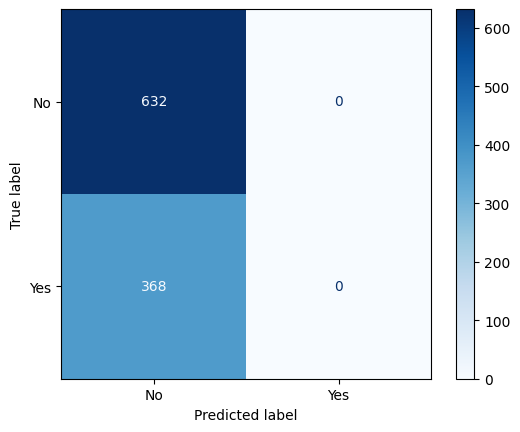

In [ ]:
# Make predictions
y_synthetic_pred = lr.predict(X_synthetic)

print("\nPerformance Metrics of Logistic Regression:\n")
performance_metrics(y_synthetic, y_synthetic_pred)

# Decision Tree

### ID3


Performance Metrics of ID3 Decision Tree:

Accuracy: 0.6320
Precision: 0.3994
Recall: 0.6320
F1 Score: 0.4895
Mean Squared Error: 0.3680

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       632
           1       0.00      0.00      0.00       368

    accuracy                           0.63      1000
   macro avg       0.32      0.50      0.39      1000
weighted avg       0.40      0.63      0.49      1000


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

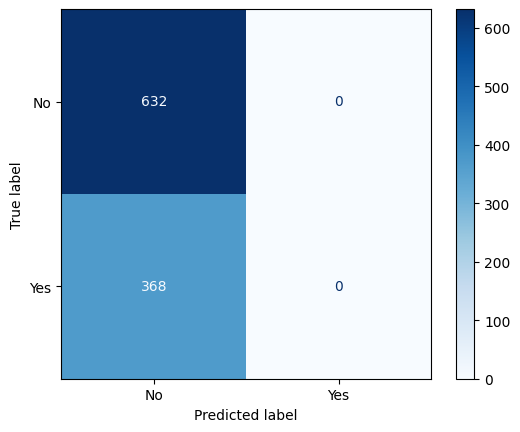

In [ ]:
# Make predictions
y_synthetic_pred = id3_classifier.predict(X_synthetic)

print("\nPerformance Metrics of ID3 Decision Tree:\n")
performance_metrics(y_synthetic, y_synthetic_pred)

### CART


Performance Metrics of CART Decision Tree:

Accuracy: 0.6320
Precision: 0.3994
Recall: 0.6320
F1 Score: 0.4895
Mean Squared Error: 0.3680

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       632
           1       0.00      0.00      0.00       368

    accuracy                           0.63      1000
   macro avg       0.32      0.50      0.39      1000
weighted avg       0.40      0.63      0.49      1000


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

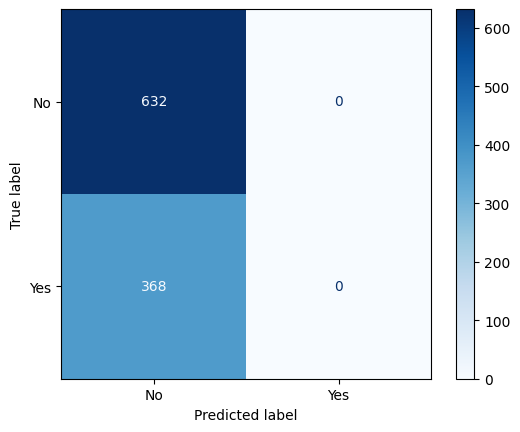

In [ ]:
# Make predictions
y_synthetic_pred = cart_classifier.predict(X_synthetic)

print("\nPerformance Metrics of CART Decision Tree:\n")
performance_metrics(y_synthetic, y_synthetic_pred)

# Saving To CSV File

In [ ]:
synthetic_data_2 = pd.concat([X_synthetic, y_synthetic], axis=1)

In [ ]:
print(synthetic_data_2.shape)

(1000, 107)


In [ ]:
synthetic_data_2.to_csv('SyntheticData2.csv', index=False)